In [106]:
# !pip3 install keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [63]:
n_epochs = 30
time_steps = 10
hidden_dim = 20
batch_size = 30
pred_timesteps = 5
activation = None
loss = 'logcosh'

In [64]:
def create_dataset(data, time_steps = time_steps):  
    # Scaling dat
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)
    
    global data_dim
    data_dim = data.shape[1]
    
    s = data[0 : time_steps].squeeze()
    for i in range(1, len(data) - time_steps):
        t = data[i: i + time_steps].squeeze()
        s = np.vstack((s, t))
    
    return s, scaler


In [65]:
class LSTM_Model():
    def __init__(self):
        self.model = Sequential()
        return 
    
    def build(self, time_steps = time_steps-1, data_dim = 1, output_dim = 1, hidden_dim = hidden_dim):
        # expected input batch shape: (batch_size, timesteps, data_dim)
        # the sample of index i in batch k is the follow-up for the sample i in batch k-1.
        # stateful?
        self.model.add(LSTM(hidden_dim, return_sequences=True, input_shape=(time_steps, data_dim)))
        self.model.add(LSTM(hidden_dim, return_sequences=True))
        self.model.add(LSTM(hidden_dim))
        self.model.add(Dense(output_dim, activation = activation)) 

        self.model.compile(loss = loss, optimizer='rmsprop', metrics=['accuracy']) #?
        return self.model

    def train_test(self, seqs, split = 0.1):
        x = seqs[:, : -1]
        y = seqs[:, -1]
        
        size = len(seqs)
        x = x[: batch_size * (size // batch_size)]
        y = y[: batch_size * (size // batch_size)]
        
        if len(x.shape) == 2:
            x = x.reshape(x.shape[0], x.shape[1], 1)
        if len(y.shape) == 1:
            y = y.reshape(y.shape[0],1)

        x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.1, shuffle = True)
        print(x_train.shape, y_train.shape)
        print(x_test.shape, y_test.shape)
       
        self.model.fit(x_train, y_train, batch_size = batch_size, epochs = n_epochs, 
                       validation_split = 0.1, verbose = 1)
        
        self.y_pred = self.predict(x_test)
        self.y_test_true = y_test
        
        self.train_plot = self.view_accuracy(self.predict(x_train), y_train, 'Train')
        self.test_plot = self.view_accuracy(self.predict(x_test), y_test, 'Test')

    def predict(self, x_test):
        pred = self.model.predict(x_test)
        return pred
    #   predict = np.reshape(predict, (predict.size, ))

    def view_accuracy(self, y_pred = None, y_true = None, plot_name = 'Test'):
        if y_pred is None:
            y_pred = self.y_pred
            y_true = self.y_test_true
            
        plt.style.use('seaborn')
        plt.figure(figsize = (10,6),)
        plt.grid(True)
        plt.plot(y_pred, color = 'lightcoral')
        plt.plot(y_true, color = 'cornflowerblue', linewidth = 1)
        plt.title(plot_name)
        plt.legend(['predict', 'true'])
        return plt


In [66]:
def try_model():
    a = pd.read_csv('VW_AAPL_20180409.csv')
    seqs, scaler = create_dataset(a)
    
    l = LSTM_Model()
    l.build()
    l.train_test(seqs)
    return l.train_plot, l.test_plot

In [67]:
# if __name__ == '__main__':
#     main()

(1566, 9, 1) (1566, 1)
(174, 9, 1) (174, 1)
Train on 1409 samples, validate on 157 samples
Epoch 1/30
1409/1409 [==============================] - 5s 3ms/step - loss: 0.0040 - acc: 7.0972e-04 - val_loss: 0.0058 - val_acc: 0.0064
Epoch 2/30
1409/1409 [==============================] - 1s 705us/step - loss: 0.0039 - acc: 7.0972e-04 - val_loss: 0.0058 - val_acc: 0.0064
Epoch 3/30
1409/1409 [==============================] - 1s 690us/step - loss: 0.0039 - acc: 7.0972e-04 - val_loss: 0.0058 - val_acc: 0.0064
Epoch 4/30
1409/1409 [==============================] - 1s 690us/step - loss: 0.0039 - acc: 7.0972e-04 - val_loss: 0.0059 - val_acc: 0.0064
Epoch 5/30
1409/1409 [==============================] - 1s 707us/step - loss: 0.0039 - acc: 7.0972e-04 - val_loss: 0.0058 - val_acc: 0.0064
Epoch 6/30
1409/1409 [==============================] - 1s 708us/step - loss: 0.0039 - acc: 7.0972e-04 - val_loss: 0.0058 - val_acc: 0.0064
Epoch 7/30
1409/1409 [==============================] - 1s 688us/step -

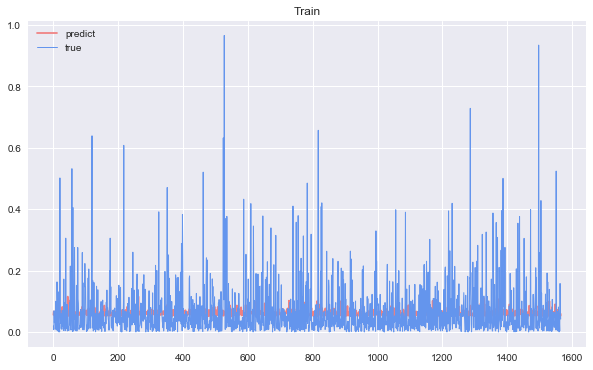

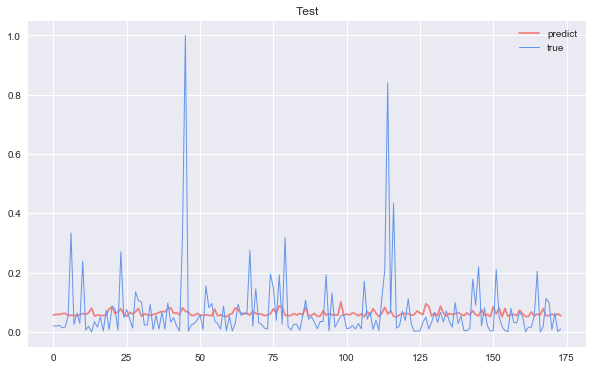

In [68]:
try_model()

In [57]:
# import os
# os.getcwd()

In [ ]:
# n_epochs = 10 ?
# time_steps = 10
# hidden_dim = 20
# batch_size = 30
# pred_timesteps = 5
# activation = None
# loss = 'logcosh'
# loss: 0.0039 - acc: 7.0972e-04 - val_loss: 0.0057 - val_acc: 0.0064